In [96]:
#Importamos las librerías necesarias
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Módulo 3: Comenzando a descubrir patrones

In [97]:
#Recuerda activar tu Drive en el panel de la izquierda y copiar el path del archivo csv
df = pd.read_csv('/content/drive/MyDrive/Crehana/Visualización de Datos con Matplotlib/Crehana - Netflix Dataset.csv', index_col = 0)

color_Netflix ='#E50914'

In [98]:
#Este es el dataset con el que estaremos trabajando
print("df Shape:",df.shape)
df.sample(5)

df Shape: (6546, 10)


,titulo,año,tipo,genero,rating,votos,pais,idioma,duracion_minutos,director
6938,On the Ropes,2018,mini series,Drama,68,108.0,Australia,English,NaN,NaN
3312,Iron Jawed Angels,2004,movie,Documentary,74,5918.0,United States,English,123.0,Katja von Garnier
1709,Question of Luck,1997,movie,Crime,62,280.0,Spain,Spanish,92.0,Rafael MoleÃ³n
4654,The Tomorrow Man,1996,movie,Adventure,52,343.0,United States,English,120.0,Bill D
6564,It's Always Sunny in Philadelphia,2005,series,Comedy,88,200421.0,United States,English,NaN,NaN


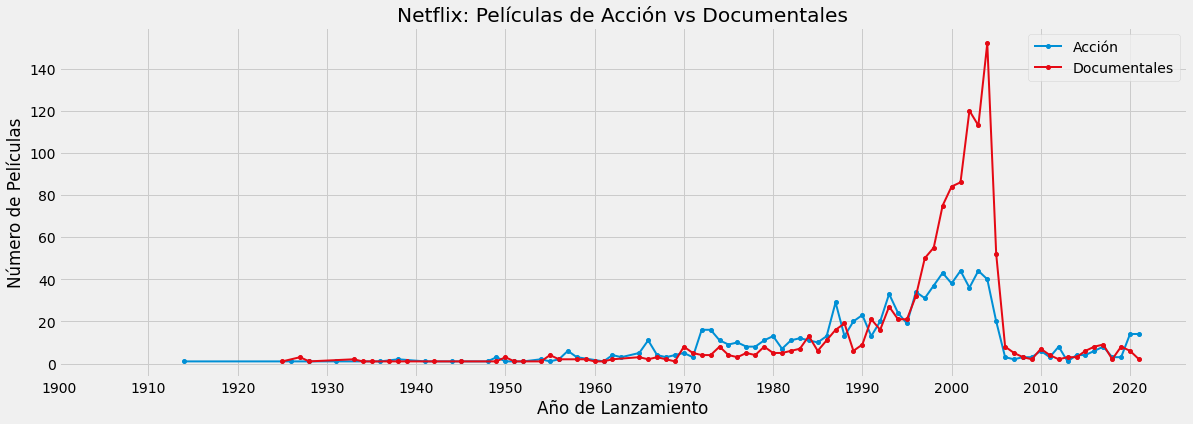

In [99]:
accion = df[df['genero'] == 'Action']
docs = df[df['genero'] == 'Documentary']

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
fig.set_size_inches(18,6)

ax.plot(accion.año.value_counts().sort_index(ascending = True), label = 'Acción', marker = 'o', markersize = 4, linewidth = 2)
ax.plot(docs.año.value_counts().sort_index(ascending = True), label = 'Documentales', marker = 'o', markersize = 4, linewidth = 2, color = color_Netflix)

xinterval = np.arange(1900,2022,10)
ax.set_xticks(xinterval)

ax.set_title('Netflix: Películas de Acción vs Documentales')
ax.legend()
ax.set_xlabel('Año de Lanzamiento')
ax.set_ylabel('Número de Películas')
plt.show()

###Organizando nuestros datos antes de graficar

In [100]:
titulos_por_genero = df.genero.value_counts(normalize = True).sort_index()

promedio_rating_genero = df.rating.groupby(df['genero']).mean().sort_values(ascending = False)

print(titulos_por_genero)
print('------')
print(promedio_rating_genero)

Action         0.135350
Adventure      0.028567
Animation      0.099756
Comedy         0.192484
Crime          0.050107
Documentary    0.184082
Drama          0.185610
Family         0.008402
Fantasy        0.009013
Horror         0.042469
Musical        0.034983
Mystery        0.004125
Reality-TV     0.003666
Short          0.014971
Sport          0.006416
Name: genero, dtype: float64
------
genero
Musical        79.082969
Documentary    73.736929
Sport          73.357143
Short          72.887755
Animation      69.075038
Crime          66.963415
Drama          66.649383
Family         65.418182
Mystery        63.962963
Comedy         63.627778
Adventure      61.951872
Action         61.612867
Reality-TV     59.000000
Fantasy        54.186441
Horror         50.219424
Name: rating, dtype: float64


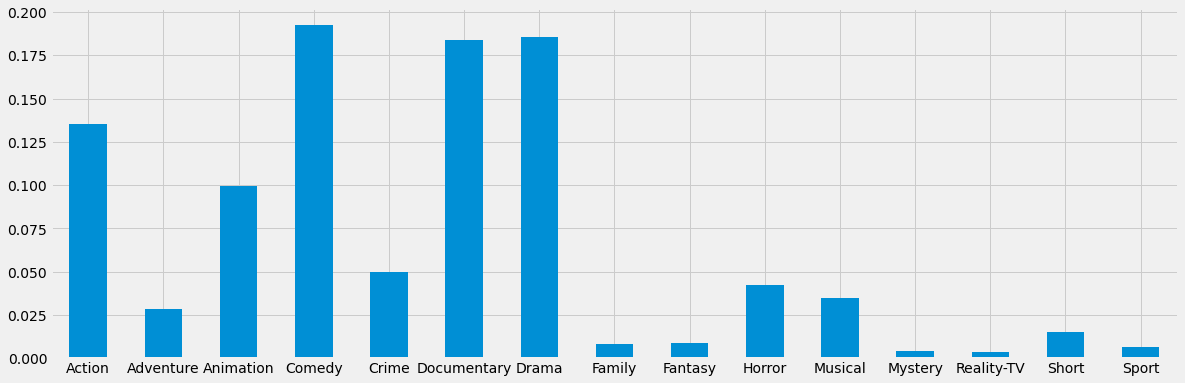

In [101]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (18, 6))

titulos_por_genero.plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.show()

###Segmentar y Graficar nuestros datos

In [102]:
#Creamos nuestras variables títulos de acción por año y sus ejes en X

accion = df[df['genero'] == 'Action']
docs = df[df['genero'] == 'Documentary']

x_accion_serie = accion.año.value_counts().sort_index(ascending = True)
x_docs_serie = docs.año.value_counts().sort_index(ascending = True)


In [103]:
#Vemos cómo queda nuestra variable
x_accion_serie

1914     1
1926     1
1928     1
1931     1
1936     1
        ..
2017     8
2018     3
2019     3
2020    14
2021    14
Name: año, Length: 79, dtype: int64

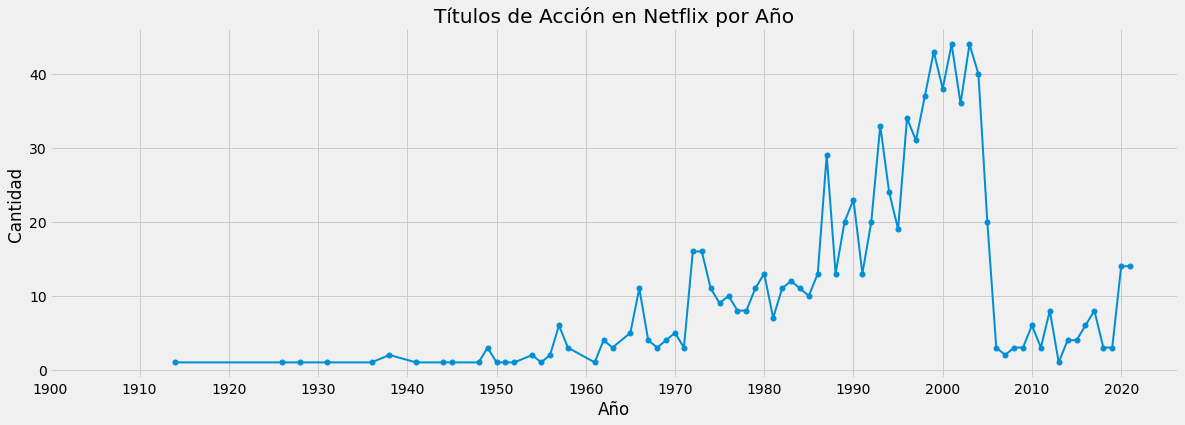

In [104]:
#Graficamos la primera variable: títulos de acción por año
fig, ax = plt.subplots()
plt.style.use('fivethirtyeight')
fig.set_size_inches(18,6)

ax.plot(x_accion_serie, marker = 'o', markersize = 5, linewidth = 2)

ax.set_title('Títulos de Acción en Netflix por Año')
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad')

xinterval = np.arange(1900,2021,10)
ax.set_xticks(xinterval)

plt.show()

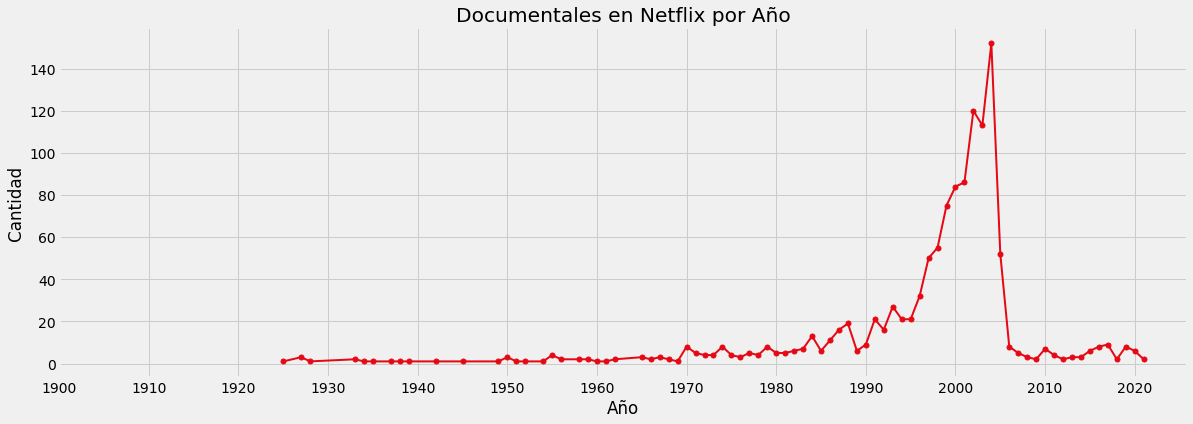

In [105]:
#Graficamos la segunda variable: documentales por año

fig, ax = plt.subplots()
plt.style.use('fivethirtyeight')
fig.set_size_inches(18,6)

ax.plot(x_docs_serie, marker = 'o', markersize = 5, linewidth = 2, color = color_Netflix)

ax.set_title('Documentales en Netflix por Año')
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad')

xinterval = np.arange(1900,2021,10)
ax.set_xticks(xinterval)

plt.show()

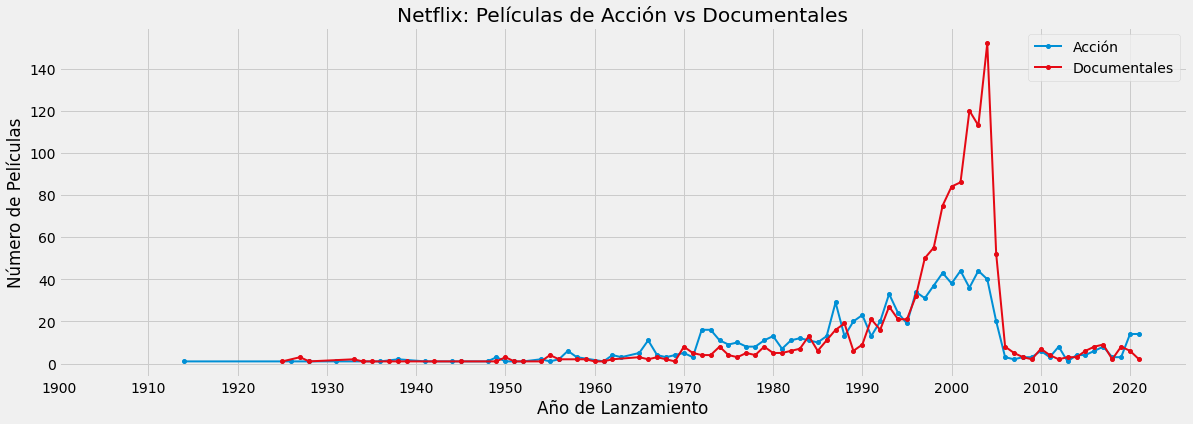

In [106]:
#Colocamos nuestras dos variables en un sólo gráfico
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
fig.set_size_inches(18,6)

ax.plot(x_accion_serie, label = 'Acción', marker = 'o', markersize = 4, linewidth = 2)
ax.plot(x_docs_serie, label = 'Documentales', marker = 'o', markersize = 4, linewidth = 2, color = color_Netflix)

xinterval = np.arange(1900,2022,10)

ax.set_title('Netflix: Películas de Acción vs Documentales')
ax.legend()
ax.set_xticks(xinterval)
ax.set_xlabel('Año de Lanzamiento')
ax.set_ylabel('Número de Películas')
plt.show()

#Módulo 4: Observando en Profundidad

In [107]:
#Hacemos zoom in en un período de tiempo

periodo = df[df['año'] >= 2010]
periodo.sample(10)

,titulo,año,tipo,genero,rating,votos,pais,idioma,duracion_minutos,director
4906,The Official 2010 World Series Film,2010,movie,Sport,74,7.0,United States,English,NaN,Matthew Anderton
981,Ferocious Planet,2011,movie,Action,40,1999.0,United States,English,88.0,Billy O
3988,Larva,2011,series,Animation,71,451.0,South Korea,None,2.0,NaN
6062,Spenser Confidential,2020,movie,Action,62,79510.0,United States,English,NaN,Peter Berg
5745,Word of Honor,2021,series,Action,90,2314.0,China,Chinese,NaN,NaN
780,Eric Clapton's Crossroads Guitar Festival 2013,2013,movie,Musical,80,122.0,United States,English,250.0,Martyn Atkins
3881,Crossbones,2014,series,Action,65,6839.0,United States,English,60.0,NaN
3318,Like Father,2018,movie,Comedy,61,20500.0,United States,English,98.0,Lauren Miller Rogen
5144,Wild Bill,2019,series,Crime,68,2287.0,United Kingdom,English,NaN,NaN
6727,Aur Pyaar Ho Gaya,2014,series,Drama,81,56.0,India,Hindi,NaN,NaN


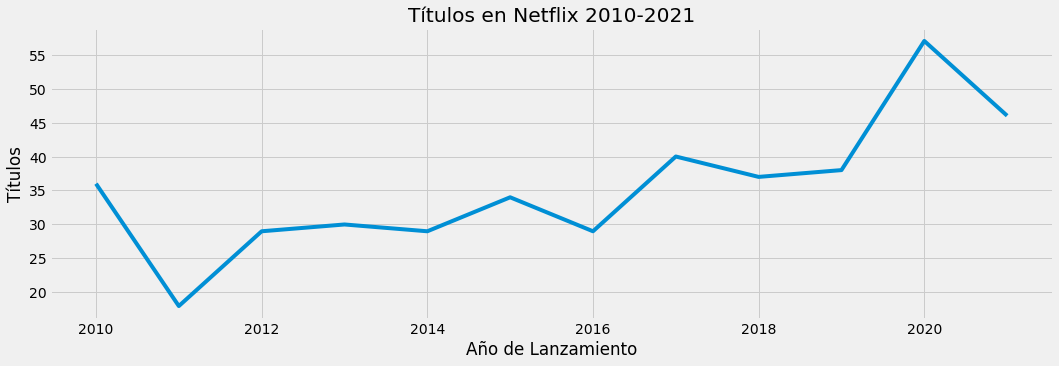

In [108]:

periodo_serie_x = periodo.año.value_counts().sort_index()

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()

fig.set_size_inches(16,5)
ax.set_title('Títulos en Netflix 2010-2021')

ax.plot(periodo_serie_x)
ax.set_xlabel('Año de Lanzamiento')
ax.set_ylabel('Títulos')

plt.show()

###Creamos un Gráfico de Barra

In [109]:
prg_periodo = periodo.rating.groupby(df['genero']).mean().sort_values(ascending = False)

prg_periodo

genero
Musical        80.000000
Short          77.321429
Documentary    73.900000
Animation      72.538462
Crime          70.096774
Sport          70.000000
Comedy         67.250000
Reality-TV     64.571429
Adventure      64.125000
Action         64.108108
Drama          63.956044
Fantasy        55.000000
Family         50.666667
Mystery        49.000000
Horror         48.555556
Name: rating, dtype: float64

In [110]:
#Crearemos un objeto inicial
periodo_agrupado = periodo.rating.groupby(periodo['genero'])

#Vamos a crear primero nuestros valores del eje x y del eje y 
x_barra = periodo_agrupado.mean().sort_values(ascending = False).index
y_barra = periodo_agrupado.mean().sort_values(ascending = False)

#Ahora vamos a crear una variable con la desviación estándar de nuestros valores 
desviacion_std = periodo_agrupado.std()
error = pd.concat([y_barra, desviacion_std], keys = ['rating', 'dv_std'], axis = 1)

In [111]:
x_barra

Index(['Musical', 'Short', 'Documentary', 'Animation', 'Crime', 'Sport',
       'Comedy', 'Reality-TV', 'Adventure', 'Action', 'Drama', 'Fantasy',
       'Family', 'Mystery', 'Horror'],
      dtype='object', name='genero')

In [112]:
y_barra

genero
Musical        80.000000
Short          77.321429
Documentary    73.900000
Animation      72.538462
Crime          70.096774
Sport          70.000000
Comedy         67.250000
Reality-TV     64.571429
Adventure      64.125000
Action         64.108108
Drama          63.956044
Fantasy        55.000000
Family         50.666667
Mystery        49.000000
Horror         48.555556
Name: rating, dtype: float64

In [113]:
desviacion_std

genero
Action         13.269150
Adventure      10.829028
Animation       8.912682
Comedy         12.110809
Crime          16.481009
Documentary    10.598529
Drama          12.564423
Family          5.859465
Fantasy        11.972190
Horror         13.305179
Musical        12.825755
Mystery        21.213203
Reality-TV      8.885515
Short          13.765371
Sport           5.228129
Name: rating, dtype: float64

In [114]:
error

,rating,dv_std
Musical,80.000000,12.825755
Short,77.321429,13.765371
Documentary,73.900000,10.598529
Animation,72.538462,8.912682
Crime,70.096774,16.481009
Sport,70.000000,5.228129
Comedy,67.250000,12.110809
Reality-TV,64.571429,8.885515
Adventure,64.125000,10.829028
Action,64.108108,13.269150


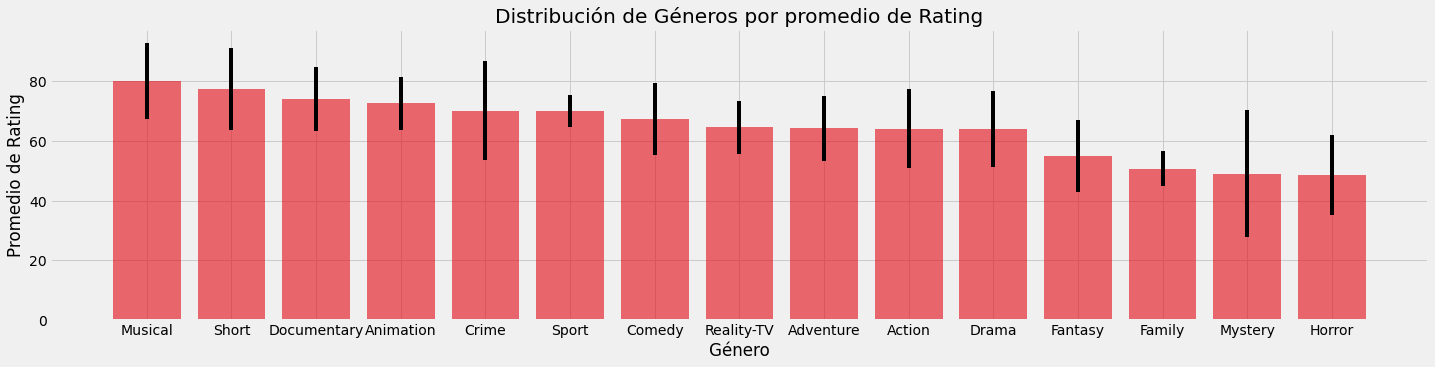

In [115]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
fig.set_size_inches(22,5)

ax.bar(x_barra, y_barra, yerr = error['dv_std'],color = color_Netflix, alpha = 0.6 )
ax.set_title('Distribución de Géneros por promedio de Rating')
ax.set_xlabel('Género')
ax.set_ylabel('Promedio de Rating')

plt.show()

### Creamos un Histograma

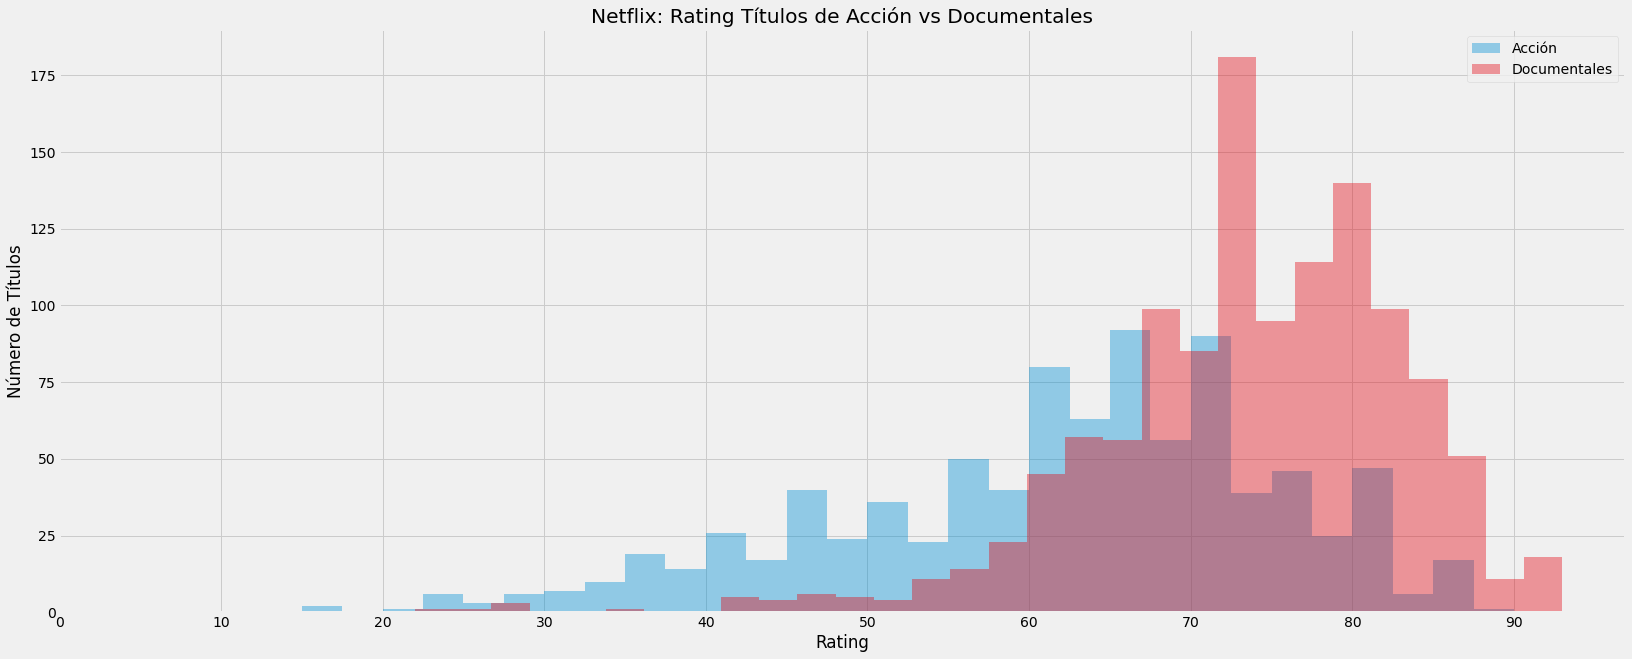

In [116]:

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
fig.set_size_inches(25,10)

ax.hist(accion.rating, bins = 30, alpha = 0.4, label = 'Acción')
ax.hist(docs.rating, bins = 30, alpha = 0.4, label = 'Documentales',color = color_Netflix )

xinterval = np.arange(0,100,10)
ax.set_xticks(xinterval)

ax.set_title('Netflix: Rating Títulos de Acción vs Documentales')
ax.legend()
ax.set_xlabel('Rating')
ax.set_ylabel('Número de Títulos')
plt.show()

In [117]:
print(np.sqrt(accion.rating.shape[0]))
print(np.sqrt(docs.rating.shape[0]))

29.765752132274432
34.713109915419565


### Creamos un gráfico de Caja

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


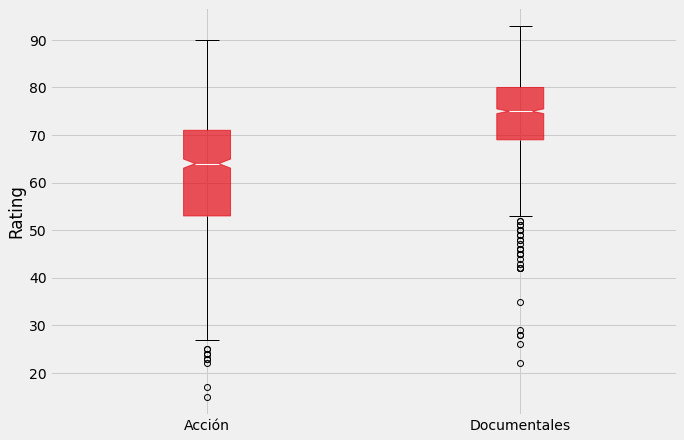

In [118]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
fig.set_size_inches(10,7)

ax.boxplot([accion.rating, docs.rating], notch = True, patch_artist = True, boxprops=dict(facecolor=color_Netflix, color=color_Netflix, alpha = 0.7), medianprops=dict(color='white'))
ax.set_xticklabels(['Acción', 'Documentales'])
ax.set_ylabel('Rating')
plt.show()


###Creamos un Gráfico de Dispersión

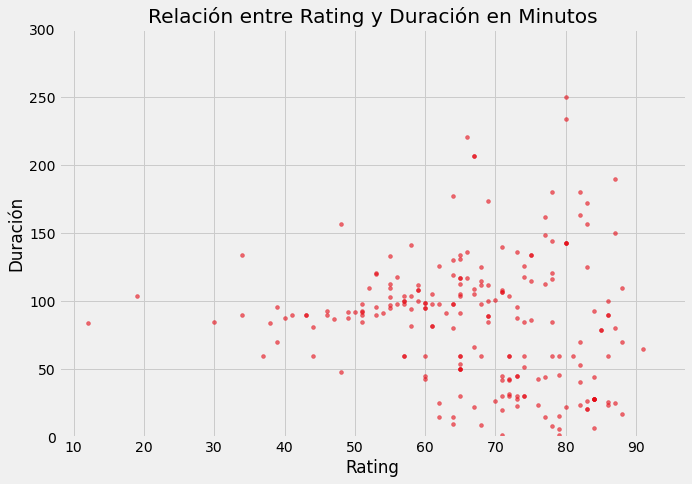

In [119]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
fig.set_size_inches(10,7)

ax.scatter(periodo.rating,periodo.duracion_minutos, alpha = 0.6, s = 15, linewidths = None, color = color_Netflix)
ax.set_ylim(0,300)

ax.set_xlabel('Rating')
ax.set_ylabel('Duración')
ax.set_title('Relación entre Rating y Duración en Minutos')

plt.show()

#Módulo 5: Automatizar y Compartir tus Visualizaciones

In [120]:
periodo_col_gen = periodo['genero'].sort_values()

periodo_col_gen

3962    Action
2687    Action
2680    Action
4837    Action
4874    Action
         ...  
3242     Short
4906     Sport
3671     Sport
187      Sport
4487     Sport
Name: genero, Length: 423, dtype: object

In [121]:
periodo_gen = periodo_col_gen.unique()

periodo_gen

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror', 'Musical',
       'Mystery', 'Reality-TV', 'Short', 'Sport'], dtype=object)

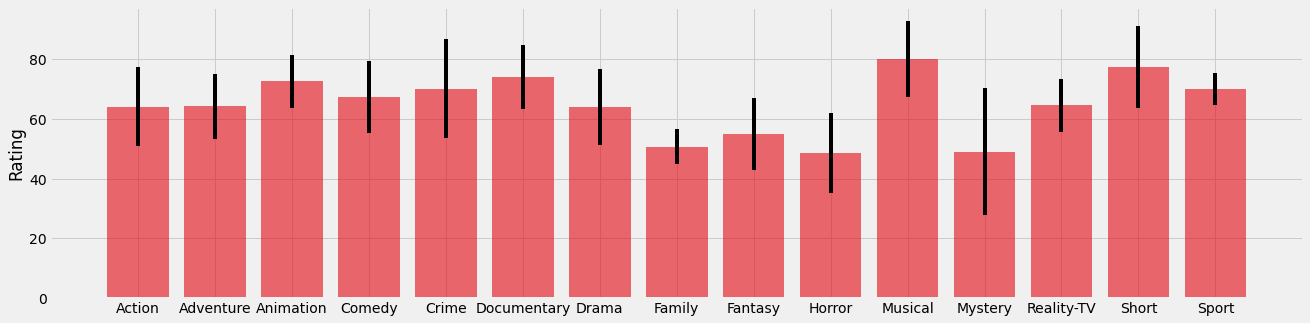

In [122]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
fig.set_size_inches(20,5)

for gen in periodo_gen:
  data_periodo = periodo[periodo['genero'] == gen]
  ax.bar(gen,data_periodo['rating'].mean(), yerr = data_periodo['rating'].std(), color = color_Netflix, alpha = 0.6)

ax.set_ylabel('Rating')
ax.set_xticklabels(periodo_gen, rotation=0)
plt.show()

fig.savefig('Géneros por Rating con Desviación Estándar.jpeg', dpi = 100)